In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"D:\Projects\ML projects\Visa Approval\data\Visadataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [2]:
df.shape

(25480, 12)

In [3]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [5]:
numeric_features = df.select_dtypes(exclude="object").columns
categoric_features = df.select_dtypes(include="object").columns

print(f"Numeric Columns {len(numeric_features)}: {numeric_features}")
print(f"Categoric Columns {len(categoric_features)}: {categoric_features}")

Numeric Columns 3: Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')
Categoric Columns 9: Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


In [6]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [7]:
df.duplicated().sum()

0

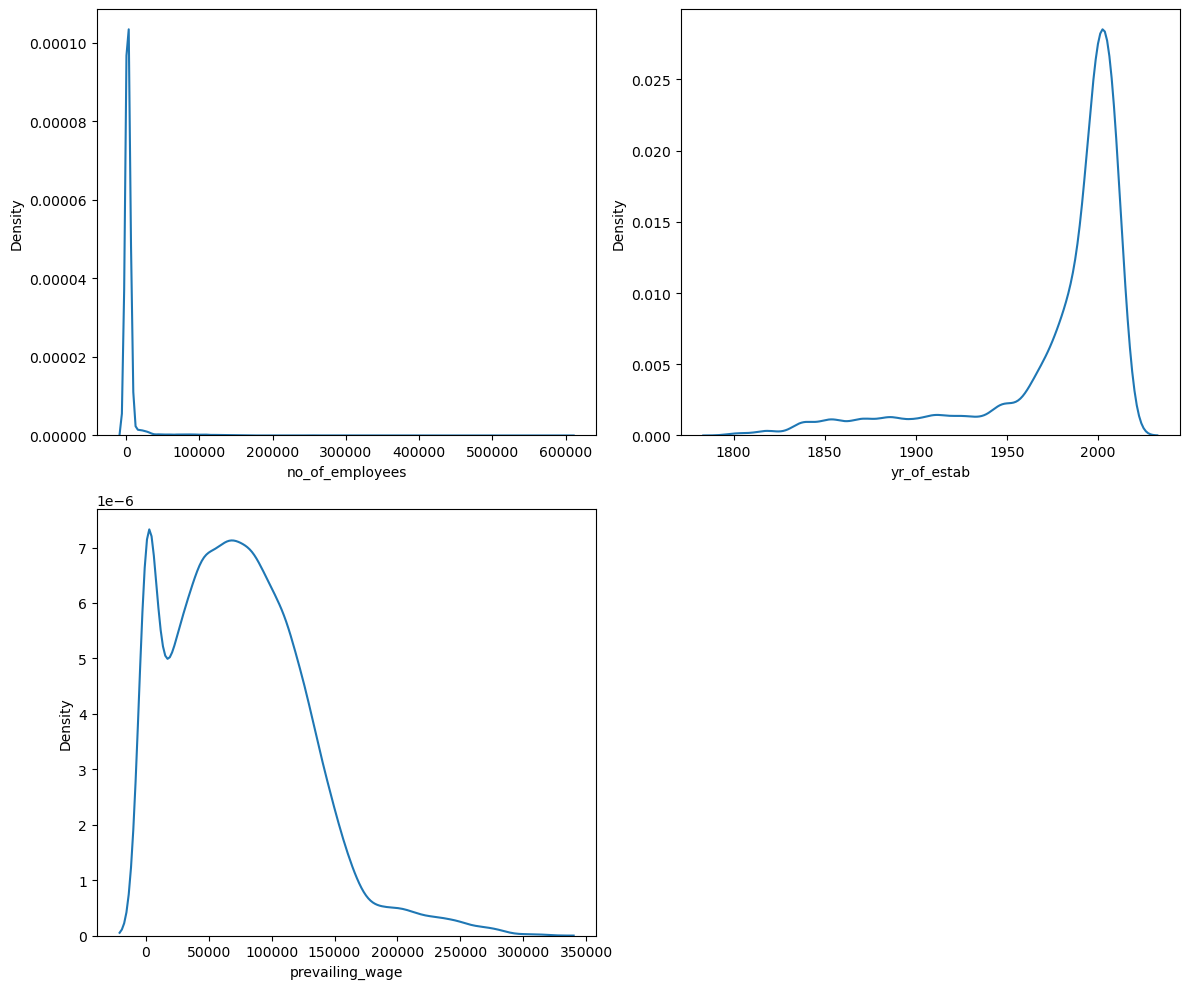

In [8]:
plt.figure(figsize=(12,10))

for i , col in enumerate(numeric_features):
    plt.subplot(2,2,i+1)
    sns.kdeplot(df[col])
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(12,10))

for i , col in enumerate(categoric_features):
    plt.subplot(3,3,i+1)
    sns.countplot(df[col])
    plt.xlabel(col)
    plt.tight_layout()
plt.show()

In [ ]:
df = df.drop("case_id",axis=1)


In [ ]:
from datetime import date

today = date.today()
current_year = today.year
df['company_age'] = current_year-df["yr_of_estab"]

In [ ]:
df = df.drop(columns="yr_of_estab")


In [ ]:
numeric_features = df.select_dtypes(exclude="object").columns
categoric_features = df.select_dtypes(include="object").columns

print(f"Numeric Columns {len(numeric_features)}: {numeric_features}")
print(f"Categoric Columns {len(categoric_features)}: {categoric_features}")

Numeric Columns 3: Index(['no_of_employees', 'prevailing_wage', 'company_age'], dtype='object')
Categoric Columns 8: Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler , LabelEncoder

encoder = LabelEncoder()
for columns in categoric_features:
    df[columns] = encoder.fit_transform(df[columns])

scaler = StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])    


In [ ]:
x = df.drop(columns="case_status")
y = df["case_status"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state =42)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(20384, 10) (5096, 10) (20384,) (5096,)


<Axes: >

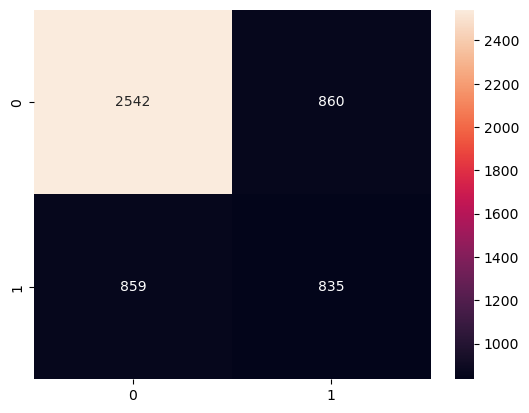

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

from sklearn.metrics import confusion_matrix

conn = confusion_matrix(y_pred,y_test)
sns.heatmap(conn,annot = True,fmt=".0f")

<Axes: >

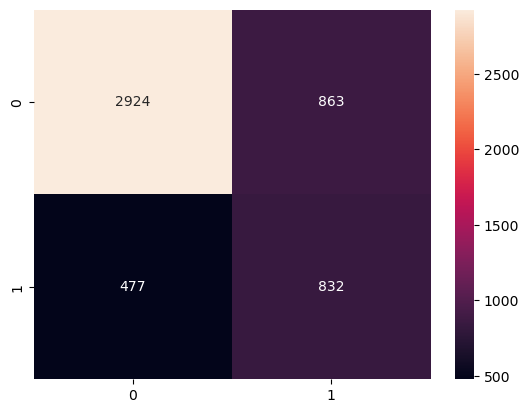

In [ ]:
from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier(random_state=42,n_estimators=150,criterion="gini",max_depth=25)   
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

from sklearn.metrics import confusion_matrix

conn = confusion_matrix(y_pred,y_test)
sns.heatmap(conn,annot = True,fmt=".0f")